In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import astropy
from astropy.timeseries import LombScargle
import six
import aplpy
from PyAstronomy.pyTiming import pyPDM

from bokeh.plotting import output_notebook, figure, show
from bokeh.models import HoverTool, tools,ColumnDataSource, Whisker, ColorBar, LinearColorMapper

output_notebook()

Loading BokehJS ...

# LightCurve U18

In [4]:
cp ../u9712005/*18.npy .

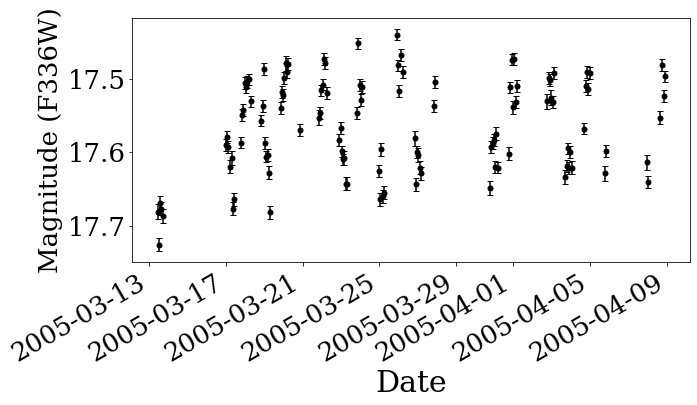

In [6]:
############
name = 'u18'
mjd = np.load('mjd'+name+'.npy')
mag = np.load('mag'+name+'.npy')
dmag = np.load('dmag'+name+'.npy')
obnames = np.load('obnames'+name+'.npy')
time = np.load('time'+name+'.npy')

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='xx-large')
plt.rc('ytick', labelsize='xx-large')


fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.invert_yaxis()
ax.set_xlabel('Date',fontsize=30)
ax.set_ylabel('Magnitude (F336W)',fontsize=26)
ax.errorbar(time, mag, yerr=dmag,fmt='.',color='k',capsize=3)
ax.tick_params(axis='both', which='major', labelsize=26)

plt.plot_date(time, mag,color='k',ms=5)

plt.gcf().autofmt_xdate()
plt.show()

#save iamge
fig.savefig('lcdate.eps', format='eps',bbox_inches = "tight")
#fig.savefig('lcdate.svg', format='svg',bbox_inches = "tight")

fig.savefig('lcdate2.svg', format='svg',bbox_inches="tight", transparent=True)


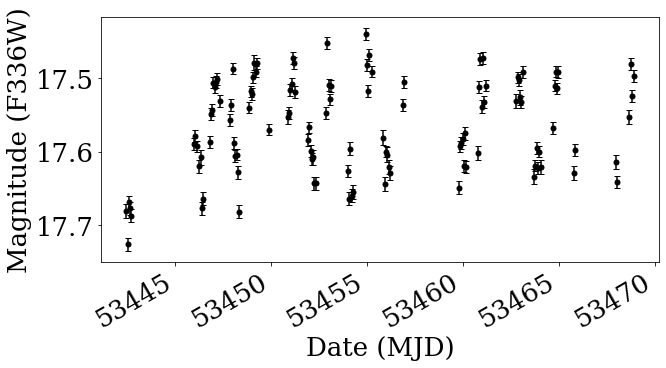

In [7]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.invert_yaxis()
ax.set_xlabel('Date (MJD)',fontsize=26)
ax.set_ylabel('Magnitude (F336W)',fontsize=26)
ax.errorbar(mjd, mag, yerr=dmag,fmt='.',color='k',capsize=3)

ax.tick_params(axis='both', which='major', labelsize=26)

plt.scatter(mjd, mag,color='k',s=25)

plt.gcf().autofmt_xdate()
plt.show()

#save iamge
fig.savefig('lcurvemjd.eps', format='eps')

In [11]:
mjd.min()-mjd.max()

-26.461805555554747

# Periodogram

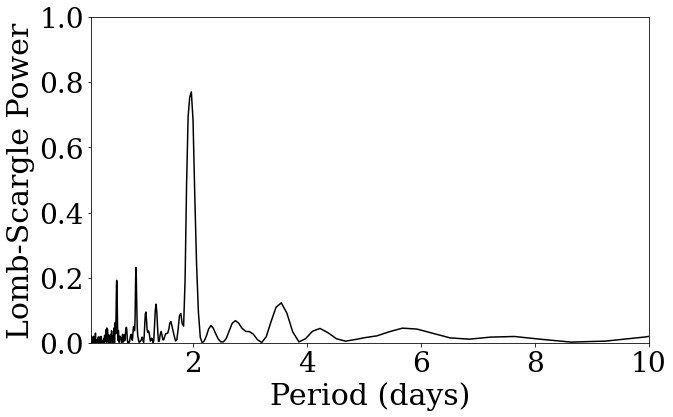

In [22]:

freq, PLS = LombScargle(mjd, mag, dmag).autopower(minimum_frequency=1 / 100.,
                                                maximum_frequency=1 / 0.1)
best_freq = freq[np.argmax(PLS)]
phase = (mjd * best_freq) % 1

# compute the best-fit model
phase_fit = np.linspace(0, 1,len(mjd))
mag_fit = LombScargle(mjd, mag, dmag).model(t=phase_fit / best_freq,
                                          frequency=best_freq)
# plot the periodogram

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set(xlim=(0.2, 10),
          ylim=(0, 1));
ax.set_xlabel('Period (days)',fontsize=30)
ax.set_ylabel('Lomb-Scargle Power',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=28)


plt.plot(1. / freq, PLS,color='k',ls='solid')

plt.show()
#save iamge
fig.savefig('periodogram.eps', format='eps',bbox_inches = "tight")


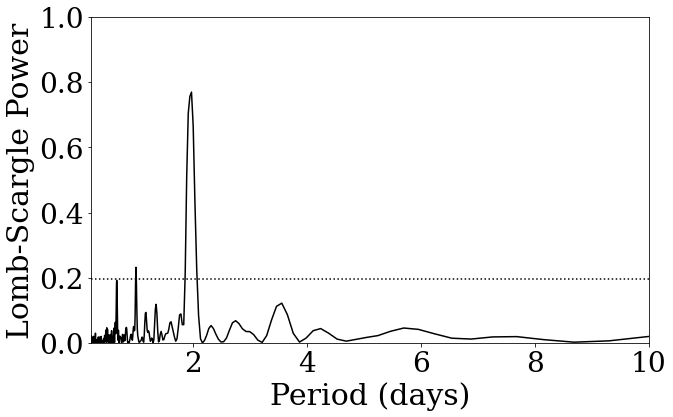

In [23]:
best_freq = best_freq/2.


ls = LombScargle(mjd, mag, dmag)


freq, PLS = ls.autopower(minimum_frequency=1/10.,
                                                maximum_frequency=1/0.1)
best_freq = freq[np.argmax(PLS)]
phase = (mjd * best_freq) % 1

# compute the best-fit model
phase_fit = np.linspace(0, 1,len(mjd))
mag_fit = LombScargle(mjd, mag, dmag).model(t=phase_fit / best_freq,
                                          frequency=best_freq)
# plot the periodogram

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set(xlim=(0.2, 10),
          ylim=(0, 1));
ax.set_xlabel('Period (days)',fontsize=30)
ax.set_ylabel('Lomb-Scargle Power',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=28)



# plot the false-alarm levels
z_false = ls.false_alarm_level(0.01, minimum_frequency=1/10.,maximum_frequency=1/0.1,
                               method='bootstrap')
ax.axhline(z_false, linestyle='dotted', color='black')


plt.plot(1. / freq, PLS,color='k',ls='solid')

plt.show()
#save iamge
fig.savefig('periodogram.eps', format='eps',bbox_inches = "tight")



In [24]:
a=ls.false_alarm_probability(PLS.max(), minimum_frequency=1 / 10.,maximum_frequency=1 / 0.1,method='baluev')

In [25]:
a

6.650330425470179e-32

In [26]:
1/100.

0.01

In [27]:
1/0.1

10.0

# Fit gaussian

Parameter('mean', value=1.9543057515566475) Parameter('stddev', value=0.06489341662537786, bounds=(1.1754943508222875e-38, None))


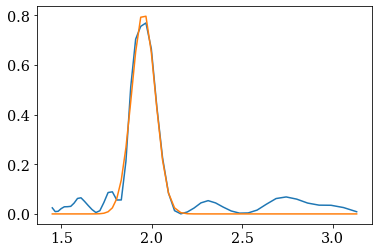

In [28]:
from astropy import modeling

fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values


per = 1/freq
persmall = per[np.argmax(PLS)-25:np.argmax(PLS)+25]
PLSsmall = PLS[np.argmax(PLS)-25:np.argmax(PLS)+25]


fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(amplitude=0.5, mean=2.0)   # depending on the data you need to give some initial values



per = 1/freq
persmall = per[np.argmax(PLS)-25:np.argmax(PLS)+25]
PLSsmall = PLS[np.argmax(PLS)-25:np.argmax(PLS)+25]

fitted_model = fitter(model, persmall, PLSsmall)



plt.plot(persmall,PLSsmall)
plt.plot(persmall, fitted_model(persmall))
print(fitted_model.mean,fitted_model.stddev)

In [29]:
print(fitted_model.mean)
fitted_model.stddev

Parameter('mean', value=1.9543057515566475)


Parameter('stddev', value=0.06489341662537786, bounds=(1.1754943508222875e-38, None))

# Folded

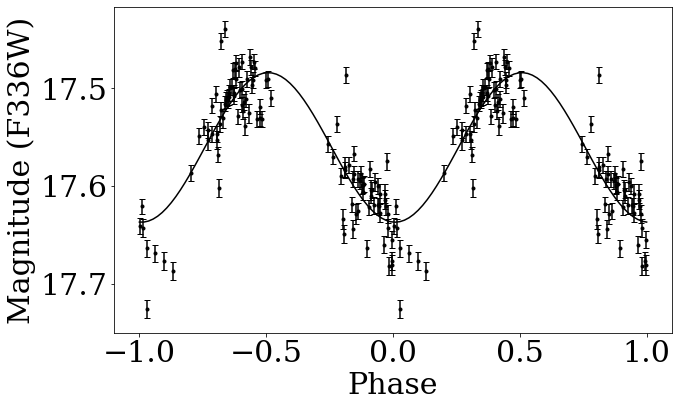

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the periodogram
best_freq = best_freq #/2.
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')



#Two phases

phase2 = phase-1
phasesall= np.concatenate((phase2, phase), axis=None)
magall = np.concatenate((mag,mag),axis=None)
dmagall = np.concatenate((dmag,dmag),axis=None)


# compute the best-fit model
phase_fit2 = np.linspace(-1, 1,len(mjd))
mag_fit2 = LombScargle(mjd, mag).model(t=phase_fit2 / best_freq,
                                          frequency=best_freq)




fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)
ax.invert_yaxis()


ax.set_xlabel('Phase',fontsize=30)
ax.set_ylabel('Magnitude (F336W)',fontsize=30)


plt.plot(phase_fit2, mag_fit2,color='k',ls='solid')
ax.errorbar(phasesall, magall,  dmagall,fmt='.',color='k',capsize=3)

ax.tick_params(axis='both', which='major', labelsize=30)

plt.show()
plt.tight_layout()



#save iamge
fig.savefig('folded.eps', format='eps',bbox_inches = "tight")
fig.savefig('folded.png', format='png',bbox_inches = "tight",dpi=1000)
fig.savefig('folded.svg', format='svg',bbox_inches="tight", transparent=True)

# Region

In [31]:
1/best_freq

1.9679793415106035

INFO: Auto-setting vmin to -6.742e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.097e-01 [aplpy.core]


TypeError: Got both 'size' and 'fontsize', which are aliases of one another

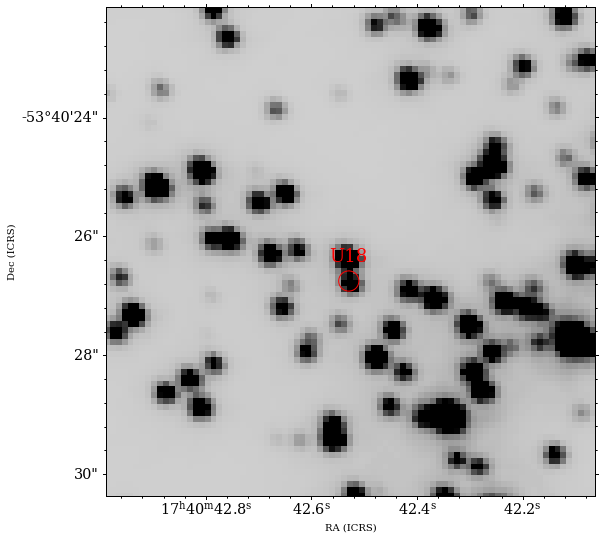

In [30]:
f = aplpy.FITSFigure('../u9712005/FixeWCSofReference/Fixedfinal_drz_sci.chip0.fits',north=True)
f.show_grayscale(invert='True')
f.recenter(265.1771907, -53.6739587, radius=0.0011430)  # degrees
f.show_regions('u18reg.reg')
f.axis_labels.set_font(size='xx-large', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal',fontsize=30)

#f.ax.tick_params(axis='both', which='major', labelsize=25)
#f.ax.tick_params(axis='x', which='major', labelsize=22)
#f.ax.tick_params(which='major', length=7)
f.axis_labels.set_xtext('RA')
f.axis_labels.set_ytext('Dec')

#f.axis_labels.hide_y()
#f.axis_labels.hide_x()
f.tick_labels.hide_x()
f.tick_labels.hide_y()


#save fig
#f.set_theme('publication')
f.savefig('hstimage.eps')
f.savefig('hst.svg', format='svg', transparent=True)

# Phase dispersion minimization

In [31]:
# Get a ``scanner'', which defines the frequency interval to be checked.
# Alternatively, also periods could be used instead of frequency.
S = pyPDM.Scanner(minVal=0.3, maxVal=10. ,dVal=0.01, mode="period")

# Carry out PDM analysis. Get frequency array
# (f, note that it is frequency, because the scanner's
# mode is ``frequency'') and associated Theta statistic (t).
# Use 10 phase bins and 3 covers (= phase-shifted set of bins).
P = pyPDM.PyPDM(mjd, mag)
f1, t1 = P.pdmEquiBin(10,S)

#f1, t1 = P.pdmEquiBinCover(10, 3, S)


# Show the result




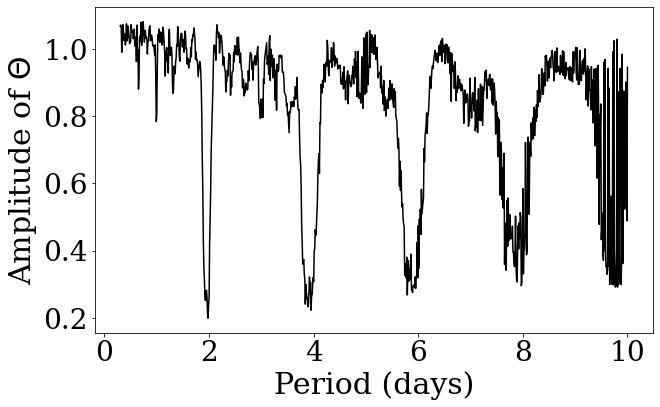

In [32]:
thetadic = {'theta':t1,
           'period':f1}  


# plot the periodogram

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)
#ax.set(xlim=(0.2, 10),
#          ylim=(0, 1));
ax.set_xlabel('Period (days)',fontsize=30)
ax.set_ylabel('Amplitude of $\Theta$',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=28)





plt.plot(thetadic['period'],thetadic['theta'],color='k',ls='solid')

plt.show()
#save iamge

#save iamge
fig.savefig('PDM.eps', format='eps',bbox_inches = "tight")
fig.savefig('PDM.png', format='png',bbox_inches = "tight")

In [33]:

# Show the result

p = figure(plot_width=500, plot_height=500, title='',active_drag='pan', active_scroll='wheel_zoom',
           y_axis_label='Theta',x_axis_label='Period')

thetadic = {'theta':t1,
           'period':f1}  


        #Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ('Date', '(@period)')
        ]
    )
p.add_tools(hover2)
p.line(x='period',y='theta',source=thetadic)
show(p)

In [34]:
from PyAstronomy.pyasl import foldAt
phases = foldAt(mjd,periodbest*2.)

wheremin = np.argmin(thetadic['theta'])
periodbest = thetadic['period'][wheremin]
thetabest = thetadic['theta'][wheremin]
print(wheremin)
print(thetabest,periodbest)

NameError: name 'periodbest' is not defined

In [ ]:
# Sort with respect to phase
# First, get the order of indices ...
sortIndi = np.argsort(phases)
# ... and, second, rearrange the arrays.
phases = phases[sortIndi]
flux = mag[sortIndi]

# Plot the result
plt.plot(phases, flux, 'bp')
plt.axis
plt.show()

# PDM Significance fromthis paper

A TES TOF SIGNIFICANCE FOR PERIODS DERIVED USING PHASE-DISPERSION MINIMIZATION TECHNIQUES

In [ ]:
wheremin = np.argmin(thetadic['theta'])
periodbest = thetadic['period'][wheremin]
thetabest = thetadic['theta'][wheremin]
print(wheremin)
print(thetabest,periodbest)

In [36]:
thetaatbestperiod = []
periodsnew = []
for i in np.arange(0,1):
    shuf = np.random.permutation (mag.size)
    

# Get a ``scanner'', which defines the frequency interval to be checked.
# Alternatively, also periods could be used instead of frequency.
    S = pyPDM.Scanner(minVal=0.01, maxVal=5. ,dVal=0.01, mode="period")

# Carry out PDM analysis. Get frequency array
# (f, note that it is frequency, because the scanner's
# mode is ``frequency'') and associated Theta statistic (t).
# Use 10 phase bins and 3 covers (= phase-shifted set of bins).
    P = pyPDM.PyPDM(mjd[shuf], mag[shuf])
    f1, t1 = P.pdmEquiBin(10,S)

#f1, t1 = P.pdmEquiBinCover(10, 3, S)

    thetadic = {'theta':t1,
               'period':f1}  

    whereminnew = np.argmin(thetadic['theta'])
    nearperiod = thetadic['period'][whereminnew]
    thetaatnearperiod = thetadic['theta'][whereminnew]

    #print(whereminnew)
    #print(f'Best Period {periodbest}')
    #print(f'thetabest {thetabest} and new theta at {nearperiod} is {thetaatnearperiod}')
    #print(f'Difference theta {thetaatnearperiod - thetabest} and difference period {periodbest-nearperiod}')
    thetaatbestperiod.append(np.min(thetadic['theta']))
    periodsnew.append(nearperiod)


In [ ]:
i

In [ ]:
shuf = np.random.permutation (mag.size)

In [ ]:
shuf

In [ ]:
mjd[shuf]

In [17]:
import pandas as pd
pdmplot = pd.read_csv('../PDM/pdmplot.csv')
pdmplot['Period'] = 1./pdmplot['Frequency']

In [18]:
thetadic = {'period':pdmplot['Period'],
           'theta':pdmplot['Theta']}

# Lomb and PDM as a subplot

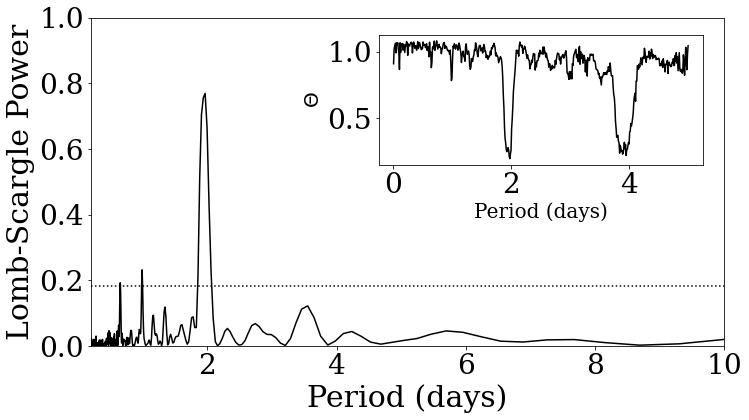

In [38]:
# set up the figure & axes for plotting

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)

#fig.suptitle('Lomb-Scargle Periodogram (period=0.41 days)')
fig.subplots_adjust(bottom=0.12, left=0.07, right=0.95)
inset = fig.add_axes([0.47, 0.54, 0.45, 0.3])


ax.set(xlim=(0.2, 10),
          ylim=(0, 1));
ax.set_xlabel('Period (days)',fontsize=30)
ax.set_ylabel('Lomb-Scargle Power',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=28)



# plot the false-alarm levels
z_false = ls.false_alarm_level(0.01, minimum_frequency=1/100.,maximum_frequency=1/0.1,
                               method='bootstrap')
ax.axhline(z_false, linestyle='dotted', color='black')


ax.plot(1. / freq, PLS,color='k',ls='solid')

# plot the phased data & model in the inset

inset.set_xlabel('Period (days)',fontsize=20)
inset.set_ylabel('$\Theta$',fontsize=20)
inset.tick_params(axis='both', which='major', labelsize=28)



inset.plot(thetadic['period'],thetadic['theta'],color='k',ls='solid')



#inset.errorbar(phase, mag, dmag, fmt='.k', capsize=0)
#inset.plot(phase_fit, mag_fit)
#inset.invert_yaxis()
#inset.set_xlabel('phase')
#inset.set_ylabel('mag')

plt.show()

#save iamge
fig.savefig('LandPDM.eps', format='eps',bbox_inches = "tight")
fig.savefig('LandPDM.png', format='png',bbox_inches = "tight")
fig.savefig('LandPDM.svg', format='svg',bbox_inches="tight", transparent=True)

In [92]:
inset.tick_params

<bound method _AxesBase.axis of <matplotlib.axes._axes.Axes object at 0x7f6ebe6ff978>>

# orbital period vs mass

Data from ATNF Pulsar Catalog with:

For redbacks:

bincomp(MS) && PB < 100 && MedMass < 5

For He WD:
bincomp(He) && PB < 100 && MedMass < 5

For Bwid:

bincomp(UL) && PB < 1 && MedMass < 0.05

In [19]:
red = np.genfromtxt('redbacks.txt',delimiter=';')
PBred=red[1:,2]
medmassred = red[1:,3]

hewd = np.genfromtxt('HeWD.txt',delimiter=';')
PBHe=hewd[1:,2]
medmassHe = hewd[1:,3]



bw = np.genfromtxt('blackw.txt',delimiter=';')
PBbw= bw[1:,2]
medmassbw = bw[1:,3]

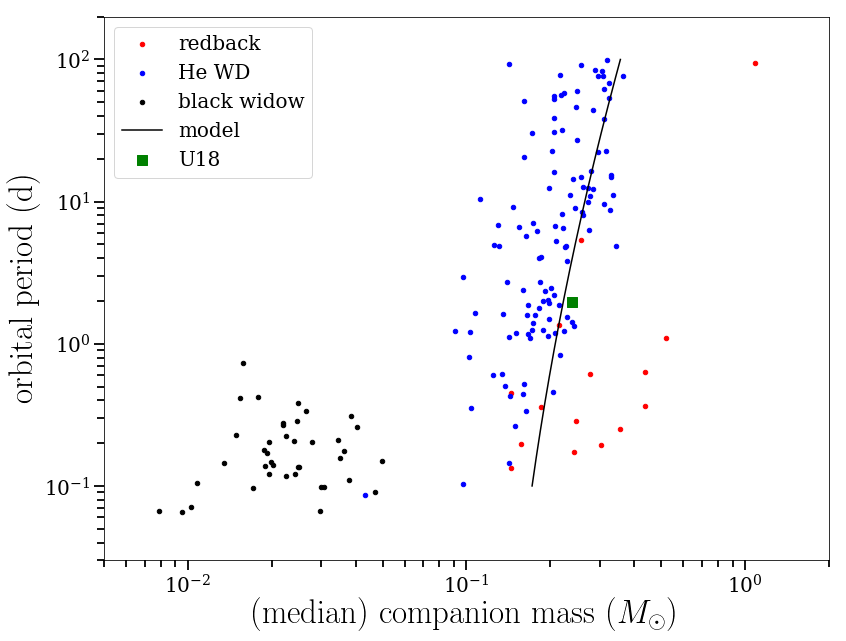

In [20]:

fig = plt.figure(figsize=(13, 10))
ax = plt.gca(xlim=[0.005,2],ylim=[0.03,200])

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


#Model
#massrange = np.arange(0.18,0.45,0.001)
porb = np.arange(0.1,100,0.001)
a = 5.00
b = 1.1*10**(5)
c = 0.11
modelmass = [(i/b)**(1/a) + c for i in porb]
models, = ax.plot(modelmass, porb,color='k',label='model')

#


reds = ax.scatter(medmassred, PBred,color='r',s=20, label='Line 2')
hes = ax.scatter(medmassHe, PBHe,color='b',s=20, label='Line 1')

bw = ax.scatter(medmassbw, PBbw,color='k',s=20, label='Line 1')



ax.set_xlabel(r'(median) companion mass $(M_\odot)$',fontsize=33,usetex=True)
ax.set_ylabel('orbital period (d)',fontsize=33,usetex=True)

#
#locmaj = matplotlib.ticker.LogLocator(base=100.0, subs=(0.1,1.0, ))
#locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 )) 

#ax.xaxis.set_major_locator(locmaj)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#ax.yaxis.set_major_locator(locmaj)
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())



# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=20,length=10, width=1.8)
ax.tick_params(axis='both', which='minor', labelsize=15,length=7, width=1.8)


ax.set_yscale('log')
ax.set_xscale('log')



#U18
u18data = [0.24,1.9652845291542833]
u18 = ax.scatter(u18data[0],u18data[1],color='g',s=100, label='u18',marker='s')

#

plt.legend([reds,hes,bw,models,u18], ['redback', 'He WD','black widow','model','U18'],prop={'size': 20})
plt.show()

#save iamge
fig.savefig('allpulsars.pdf', format='pdf')

In [241]:
1/best_freq

1.9652845291542833